In [68]:
import pandas as pd
import os
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

In [22]:
def bar(df, x, y, title, text=0, margin=np.inf):
    """
    A function to plot bar graph
    Args:
        - df--> DataFrame.
        - x --> x axis values.
        - y --> y axis values.
        - text --> values for text.
        - margin --> margin value.
        - title --> the graph title.
    """
    if text == 0:
        text = y
    fig = px.bar(df, x=f"{x}", y=f"{y}", text=f"{y}")

    fig.update_layout(xaxis=dict(title=f"{x}", tickmode="linear", dtick=1))

    clrs = ["red" if (y > margin) else "#5296dd" for y in df[f"{y}"]]

    fig.update_traces(
        marker_color=clrs, marker_line_width=1.5, opacity=1, textposition="auto"
    )
    fig.show("svg")

In [25]:
def pie(df, title):
    """
    A function to plot pie graph
    Args:
        - df--> DataFrame.
        - title --> the graph title
    """

    colors = px.colors.qualitative.T10

    fig = px.pie(
        df,
        values=f"{df.columns[1]}",
        names=f"{df.columns[0]}",
        color_discrete_sequence=colors,
        title=title,
    )

    fig.update_traces(
        textposition="inside",
        textinfo="percent+label+value",
        textfont=dict(size=12, color="white"),
    )
    fig.show("svg")

In [2]:
df_videos = pd.read_csv("clean_data/video_data_cleaned.csv")

In [3]:
df_videos.head()

,id,etag,p_dtime,ch_id,title,description,ch_title,snippet.tags,category,duration,is_licensed,n_views,n_likes,n_dislikes,n_comments,year
0,14SUI93R_k8,zUX2H4amXbJxvecYfsO-9mMha7c,2021-03-19 17:00:30+00:00,UC-NINtNMPM75eaqh07RCy_Q,jason momoa defends amber heard after aquaman ...,jason momoa defends amber heard after aquaman ...,InformOverload,"['io', 'informoverload', 'inform overload', 'a...",Education,0 days 00:04:45,True,32001,1394.0,71.0,942.0,2021
1,9rC1gEB5wSk,W_OcjSa0xjX5E8u4uZKGTkOVnek,2020-12-30 16:25:16+00:00,UCNoGr_InOOlv0XhHO9KC3Hg,solving a rubik's cube everyday until amber he...,fire amber heard 😡,Fire Amber Heard,NaN,People & Blogs,0 days 00:00:21,False,4,2.0,0.0,0.0,2020
2,nkofr7qZSw0,rz1_nfM8S8B8philEP9Y1CIt2fE,2019-04-28 16:13:50+00:00,UC4L8zPgbx3ZATeWZ-iEIKiA,"amber heard ,jacob latimore ,charlie plummer k...","amber heard , jacob latimore , charlie plummer...",Zach Simmons,"['Amber Heard', 'Jacob Lattimore', 'connection...",Entertainment,0 days 00:15:33,False,1768,21.0,21.0,8.0,2019
3,82niI4hiImY,JH06ceCKw9jT7K-EdPycpZ7_LaE,2021-12-05 13:19:52+00:00,UCeooMl4PFAM9kLPHvavt2KQ,amber heard trolls on twitter again!?,amber heard trolls on twitter again!?\n\ncheck...,eHacker,"['Amber Heard', 'Amber heard twitter', 'Amber ...",Entertainment,0 days 00:05:45,True,2604,376.0,1.0,148.0,2021
4,kNA2wjVsp9c,NoIaeQvZ9WgkrjicJcz5wPlHiT4,2021-06-15 18:37:07+00:00,UCycYfOSLuPwdKJx4fLrlJgA,amber heard workout for aquaman-2 🔥,NaN,Random Watch,NaN,People & Blogs,0 days 00:00:31,False,327,9.0,8.0,0.0,2021


In [4]:
df_videos.shape

(6893, 16)

In [5]:
df_videos.id.nunique()

6893

In [6]:
df_videos.etag.nunique()

6893

In [11]:
df_videos.p_dtime.min(), df_videos.p_dtime.max()

('2008-01-07 17:02:08+00:00', '2021-12-06 22:58:02+00:00')

In [18]:
years = (
    df_videos.groupby("year")
    .count()["id"]
    .to_frame()
    .reset_index()
    .rename(columns={"id": "n_videos"})
)

In [37]:
years

,year,n_videos
0,2008,3
1,2009,15
2,2010,14
3,2011,47
4,2012,20
5,2013,78
6,2014,59
7,2015,89
8,2016,329
9,2017,213


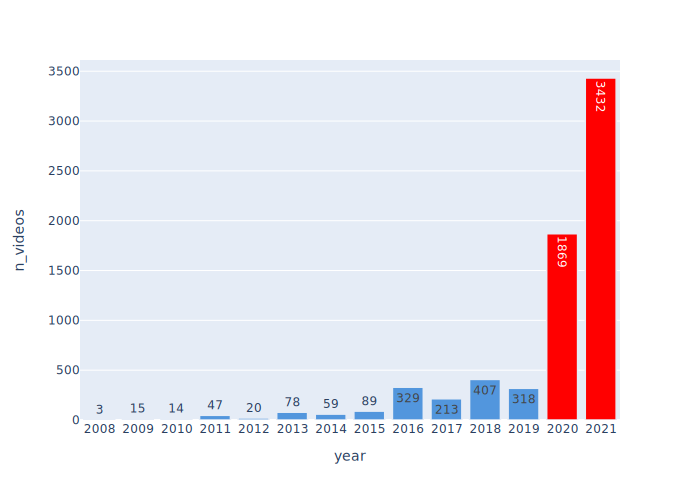

In [29]:
bar(years, "year", "n_videos", "Number of Videos over Years", text=0, margin=500)

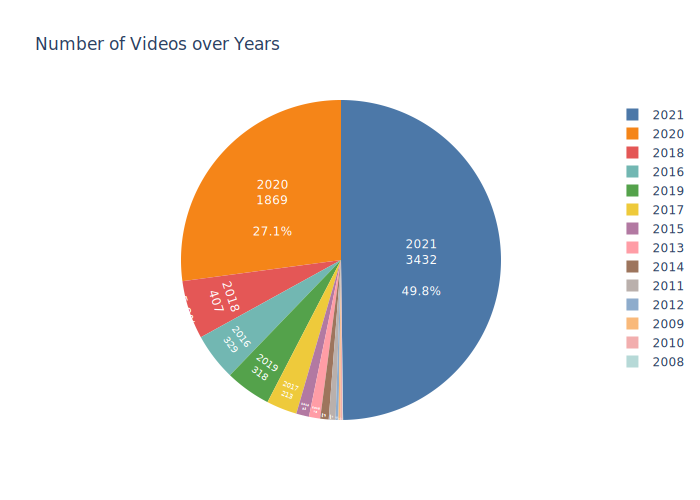

In [27]:
pie(years, "Number of Videos over Years")

In [35]:
categories = df_videos["category"].value_counts().to_frame().reset_index().rename(
    columns={"index": "category",
            "category": "n_videos"}
)

In [36]:
categories

,category,n_videos
0,Entertainment,3785
1,People & Blogs,1477
2,Film & Animation,593
3,News & Politics,431
4,Education,187
5,Music,100
6,Howto & Style,76
7,Comedy,67
8,Gaming,67
9,Science & Technology,29


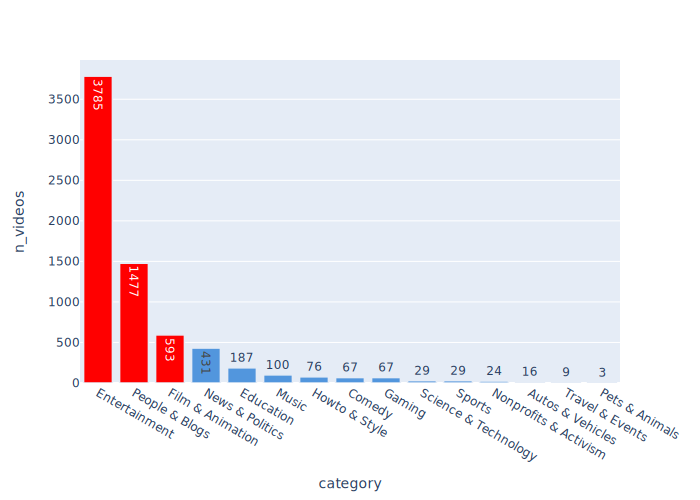

In [38]:
bar(categories, "category", "n_videos", "Videos Categries", text=0, margin=500)

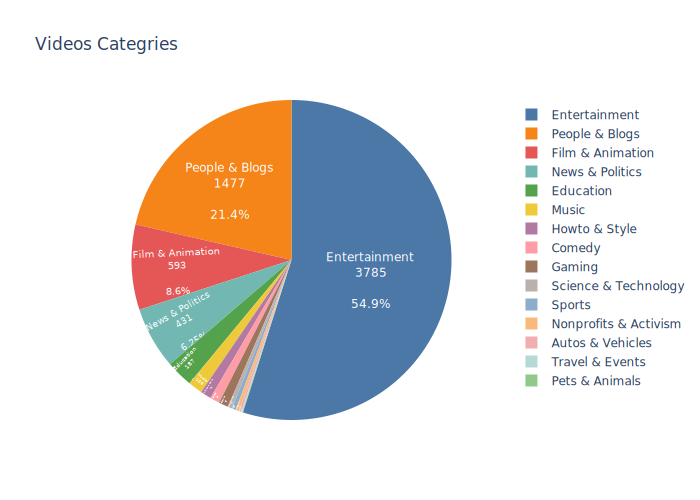

In [39]:
pie(categories, "Videos Categries")

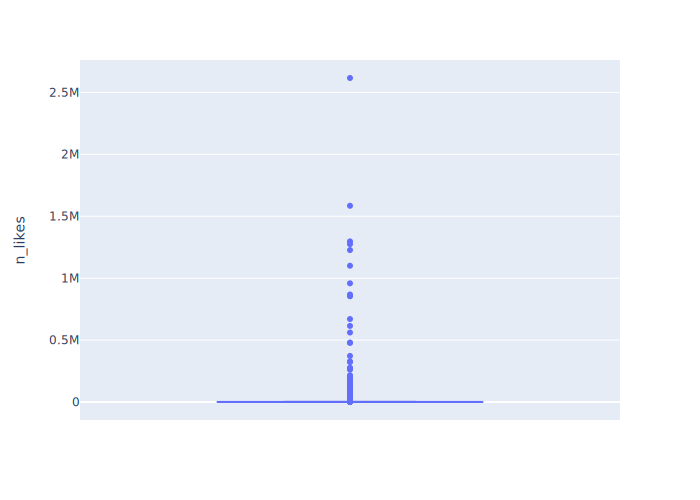

In [50]:
fig = px.box(df_videos, y="n_likes")
fig.show("svg")

In [59]:
df_videos["n_likes"].describe()

count    6.697000e+03
mean     4.811032e+03
std      5.656654e+04
min      0.000000e+00
25%      7.000000e+00
50%      8.600000e+01
75%      6.690000e+02
max      2.616631e+06
Name: n_likes, dtype: float64

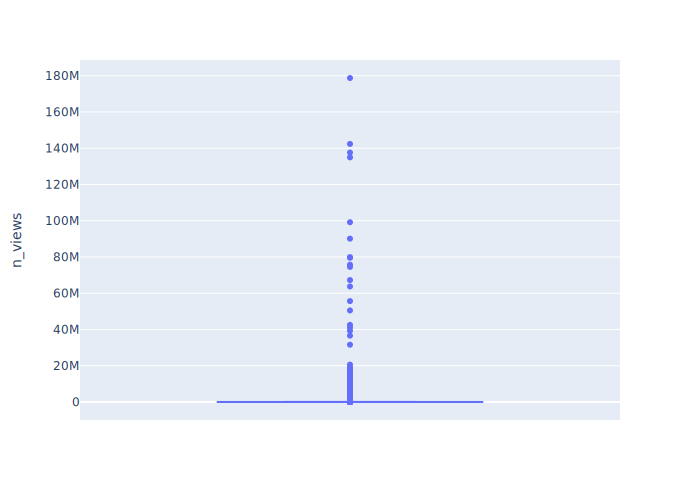

In [51]:
fig = px.box(df_videos, y="n_views")
fig.show("svg")

In [60]:
df_videos["n_views"].describe()

count    6.893000e+03
mean     3.691218e+05
std      4.803435e+06
min      0.000000e+00
25%      2.800000e+02
50%      2.603000e+03
75%      2.360300e+04
max      1.787249e+08
Name: n_views, dtype: float64

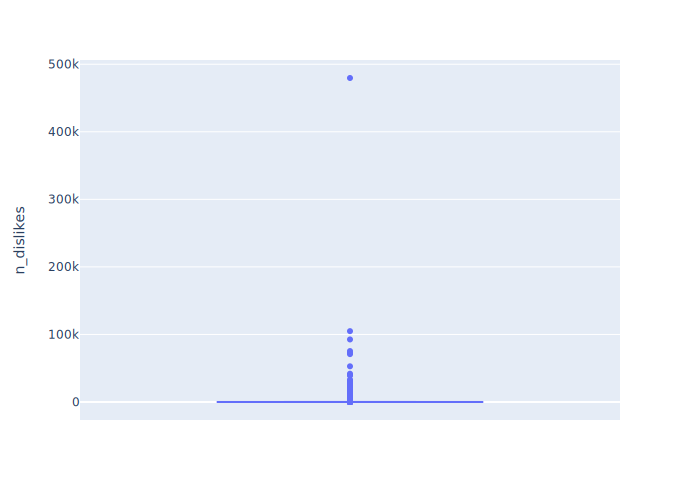

In [52]:
fig = px.box(df_videos, y="n_dislikes")
fig.show("svg")

In [61]:
df_videos["n_dislikes"].describe()

count      6697.000000
mean        345.131999
std        6532.767791
min           0.000000
25%           1.000000
50%           6.000000
75%          34.000000
max      479614.000000
Name: n_dislikes, dtype: float64

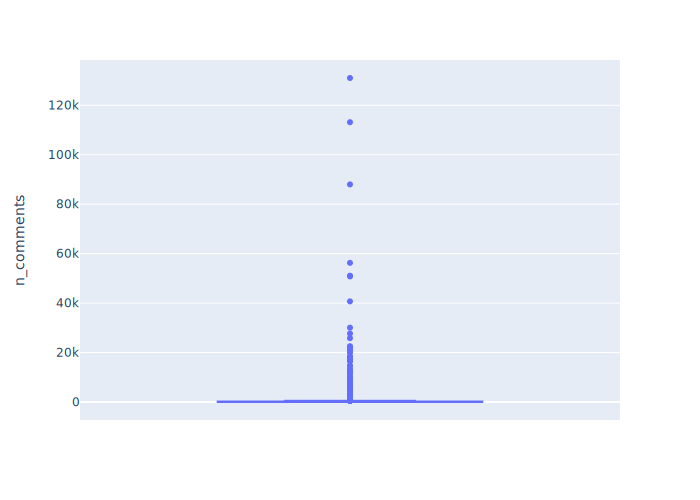

In [54]:
fig = px.box(df_videos, y="n_comments")
fig.show("svg")

In [62]:
df_videos["n_comments"].describe()

count      6707.000000
mean        399.017295
std        2982.544042
min           0.000000
25%           1.000000
50%          21.000000
75%         195.000000
max      131021.000000
Name: n_comments, dtype: float64

In [70]:
datetime.datetime.strptime(df_videos.duration[0], "%H:%M:%S")

ValueError: time data '0 days 00:04:45' does not match format '%H:%M:%S'

In [74]:
df_videos["duration"] = pd.to_timedelta(df_videos.duration)

In [75]:
df_videos["duration_seconds"] = df_videos["duration"].apply(lambda x: x.total_seconds())

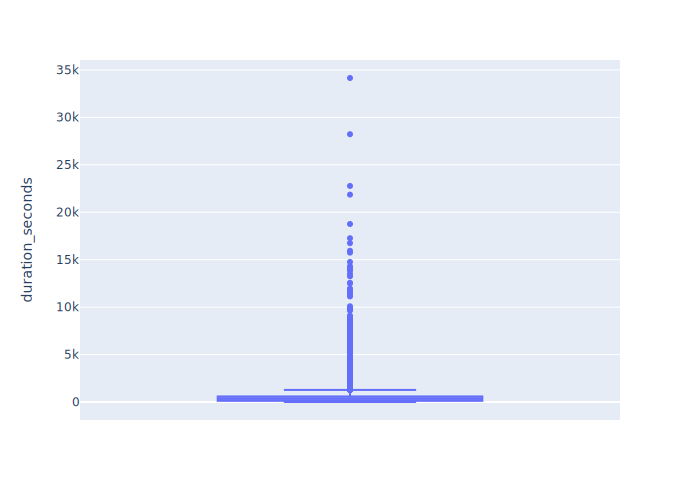

In [76]:
fig = px.box(df_videos, y="duration_seconds")
fig.show("svg")

In [77]:
df_videos["duration_seconds"].describe()

count     6893.000000
mean       697.487306
std       1488.500020
min          2.000000
25%        127.000000
50%        350.000000
75%        587.000000
max      34150.000000
Name: duration_seconds, dtype: float64

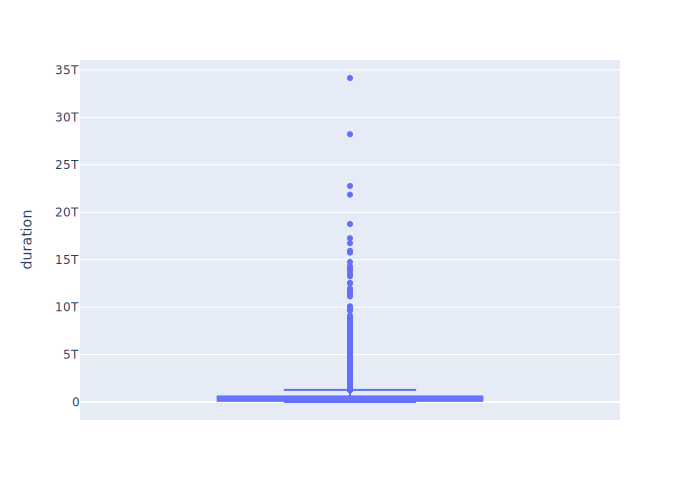

In [78]:
fig = px.box(df_videos, y="duration")
fig.show("svg")

In [79]:
df_videos["duration"].describe()

count                         6893
mean     0 days 00:11:37.487305962
std      0 days 00:24:48.500020038
min                0 days 00:00:02
25%                0 days 00:02:07
50%                0 days 00:05:50
75%                0 days 00:09:47
max                0 days 09:29:10
Name: duration, dtype: object

In [85]:
sum(df_videos["title"].duplicated())

188

#### 188 repeated titles

In [100]:
df_videos["title"].value_counts().head(133)

gully official trailer (2021) amber heard                                         10
amber heard                                                                        7
amber heard : après johnny depp et elon musk, sean penn serait sous son charme     6
gully official trailer (2021)                                                      5
johnny depp loses his libel case against amber heard when doves cry                5
                                                                                  ..
elon musk motivation for success, business and money #shorts                       2
amber heard and elon musk were caught kissing despite confirming split             2
gully official trailer 2021 amber heard                                            2
amber heard it's time for our generation to make our voices heard                  2
amber heard hit by rumours she's been 'fired from aquaman 2'                       2
Name: title, Length: 133, dtype: int64